In [26]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join("Preprocessed_data.csv"), nrows= 100000)
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [7]:
#Dropping everything but age, language, category, state, and country. 
#potentially could incorporate author and rating somehow
clean_df = df.drop(["Unnamed: 0", "user_id", "location", "isbn", "rating", "book_author", "year_of_publication", "publisher", "img_m", "img_l", "img_s", "Summary", "city"], axis=1)
clean_df

,age,book_title,Language,Category,state,country
0,18.0000,Classical Mythology,en,['Social Science'],california,usa
1,34.7439,Clara Callan,en,['Actresses'],ontario,canada
2,49.0000,Clara Callan,en,['Actresses'],ontario,canada
3,34.7439,Clara Callan,en,['Actresses'],NaN,NaN
4,34.7439,Clara Callan,en,['Actresses'],ontario,canada
...,...,...,...,...,...,...
99995,35.0000,Angel Falls,en,['Fiction'],washington,usa
99996,37.0000,Angel Falls,en,['Fiction'],california,usa
99997,44.0000,Angel Falls,en,['Fiction'],georgia,usa
99998,34.7439,Angel Falls,en,['Fiction'],washington,usa


In [23]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   age         100000 non-null  float64
 1   book_title  100000 non-null  object 
 2   Language    100000 non-null  object 
 3   Category    100000 non-null  object 
 4   state       98159 non-null   object 
 5   country     96487 non-null   object 
dtypes: float64(1), object(5)
memory usage: 4.6+ MB


In [8]:
y = clean_df["book_title"]
y

0        Classical Mythology
1               Clara Callan
2               Clara Callan
3               Clara Callan
4               Clara Callan
                ...         
99995            Angel Falls
99996            Angel Falls
99997            Angel Falls
99998            Angel Falls
99999            Angel Falls
Name: book_title, Length: 100000, dtype: object

In [20]:
X = clean_df.drop("book_title", axis=1)
X.head()

,age,Language,Category,state,country
0,18.0000,en,['Social Science'],california,usa
1,34.7439,en,['Actresses'],ontario,canada
2,49.0000,en,['Actresses'],ontario,canada
3,34.7439,en,['Actresses'],NaN,NaN
4,34.7439,en,['Actresses'],ontario,canada


In [11]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
encoded_y

array([276, 274, 274, ..., 119, 119, 119])

In [16]:
cat_columns = X.drop("age", axis=1)
cat_encode = cat_columns.apply(LabelEncoder().fit_transform)
cat_encode

,Language,Category,state,country
0,4,177,141,172
1,4,4,590,29
2,4,4,590,29
3,4,4,895,184
4,4,4,590,29
...,...,...,...,...
99995,4,109,841,172
99996,4,109,141,172
99997,4,109,270,172
99998,4,109,841,172


In [21]:
X_model = pd.DataFrame(zip(X["age"], cat_encode["Language"], cat_encode["Category"], cat_encode["state"], cat_encode["country"]), columns = ["age", "Language", "Category", "state", "country"])
X_model

,age,Language,Category,state,country
0,18.0000,4,177,141,172
1,34.7439,4,4,590,29
2,49.0000,4,4,590,29
3,34.7439,4,4,895,184
4,34.7439,4,4,590,29
...,...,...,...,...,...
99995,35.0000,4,109,841,172
99996,37.0000,4,109,141,172
99997,44.0000,4,109,270,172
99998,34.7439,4,109,841,172


In [ ]:
### Working section

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_model, encoded_y, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [29]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.218/0.040
k: 3, Train/Test Score: 0.143/0.035
k: 5, Train/Test Score: 0.125/0.038
k: 7, Train/Test Score: 0.114/0.040
k: 9, Train/Test Score: 0.109/0.040
k: 11, Train/Test Score: 0.104/0.040
k: 13, Train/Test Score: 0.102/0.041
k: 15, Train/Test Score: 0.100/0.042
k: 17, Train/Test Score: 0.098/0.042
k: 19, Train/Test Score: 0.096/0.042
k: 21, Train/Test Score: 0.094/0.042
k: 23, Train/Test Score: 0.093/0.042
k: 25, Train/Test Score: 0.091/0.042
k: 27, Train/Test Score: 0.090/0.044
k: 29, Train/Test Score: 0.088/0.044
k: 31, Train/Test Score: 0.086/0.044
k: 33, Train/Test Score: 0.085/0.044
k: 35, Train/Test Score: 0.083/0.042
k: 37, Train/Test Score: 0.082/0.042
k: 39, Train/Test Score: 0.081/0.042
k: 41, Train/Test Score: 0.081/0.041
k: 43, Train/Test Score: 0.079/0.041
k: 45, Train/Test Score: 0.079/0.041
k: 47, Train/Test Score: 0.079/0.042
k: 49, Train/Test Score: 0.078/0.041


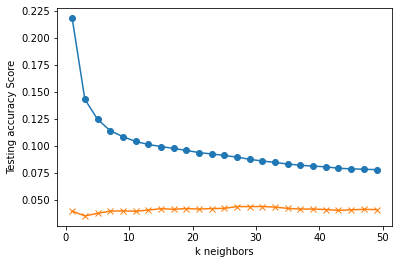

In [32]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(X)
encoded_X = label_encoder.transform(X)
encoded_X

In [ ]:
model_columns = df.drop(["book_title", "img_m", "img_l", "img_s", "Summary", "isbn", "location", "Unnamed: 0"], axis=1)
model_columns.head()

In [ ]:
y = df["book_title"]
#target_names = ["negative", "positive"]
y

In [ ]:
X = df.drop(["book_title", "img_m", "img_l", "img_s", "Summary", "isbn", "location", "Unnamed: 0"], axis=1)
X.head()

In [ ]:
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = ['embarked','class1','deck1','who','embark_town','sex','adult_male','alive','alone']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(impute_data[columns])

In [ ]:
#for label, original_class in zip(encoded_y, y):
#    print('Original Class: ' + str(original_class))
#    print('Encoded Label: ' + str(label))
#    print('-' * 12)

In [ ]:
#Can't run this on local machine
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))